In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample


In [2]:
# Load processed data
# data_balanced = pd.read_csv('../data/processed/Loan_Default_Cleaned.csv')
data_balanced = pd.read_csv('../data/processed/Loan_Default_Cleaned_No_Noice.csv') # Some columns are removed

In [3]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70510 entries, 0 to 70509
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   loan_amount                        70510 non-null  float64
 1   rate_of_interest                   70510 non-null  float64
 2   Interest_rate_spread               70510 non-null  float64
 3   Upfront_charges                    70510 non-null  float64
 4   term                               70510 non-null  float64
 5   property_value                     70510 non-null  float64
 6   income                             70510 non-null  float64
 7   LTV                                70510 non-null  float64
 8   Status                             70510 non-null  bool   
 9   dtir1                              70510 non-null  float64
 10  credit_type_CRIF                   70510 non-null  bool   
 11  credit_type_EQUI                   70510 non-null  boo

In [ ]:
# Define features and target variable
X = data_balanced.drop(columns=['Status'])  # Drop target variable
y = data_balanced['Status']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

NameError: name 'X_train_scaled' is not defined

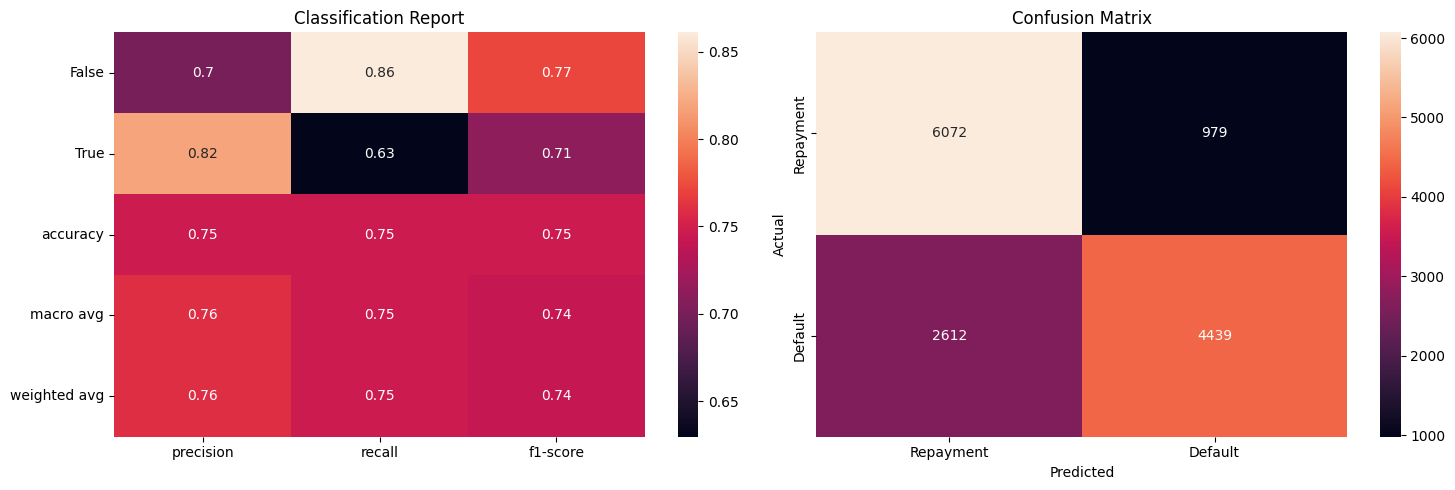

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Classification report as heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, ax=ax[0])
ax[0].set_title('Classification Report')

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=['Repayment', 'Default'], yticklabels=['Repayment', 'Default'], ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
ax[1].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()


Here’s a more concise and informal breakdown for your notes:

---

## **Logistic Regression Results (Baseline Model)**  

### **Accuracy: 86.03%**  
Solid performance, but let’s break it down further.  

### **Classification Report Highlights:**  
- **Precision:**  
  - Repayment (0) → 85%  
  - Default (1) → 98% (high, but misleading)  
- **Recall:**  
  - Repayment (0) → **100%** (too good, possible bias)  
  - Default (1) → **44%** (bad, misses a lot of defaults)  
- **F1-score:**  
  - Default detection is weak (61%), needs improvement.  

### **Confusion Matrix Takeaways:**  
- **False Negatives (3,951 cases):** Model misclassified many defaulters as repayers.  
- **False Positives (71 cases):** Very few false alarms on defaults.  
- **Overall:** Model is **biased towards predicting repayments**—likely due to class imbalance.  

### **Key Fixes to Consider:**  
✅ **Handle class imbalance** → Try **class weighting** or **oversampling (SMOTE)**  
✅ **Feature engineering** → Extract better predictors  
✅ **Test different models** → Random Forest, XGBoost could boost recall  

### **Bottom Line:**  
Model is **good at predicting repayments, bad at catching defaults**. If used in production, it would miss a lot of risky loans. Need to **balance recall vs. precision** to improve.  

---

Short and to the point! Let me know if you need tweaks. 🚀

After class balancing here new insights:
### **Key Differences Between the Two Models**

#### **1. Accuracy Shift**
- **Previous Model:** **86% Accuracy**
- **Updated Model:** **76% Accuracy**
- The new model is slightly less accurate but might be making better trade-offs between recall and precision.

#### **2. Recall for Defaults Improved**
- **Previous Model:** **Recall for Default (Class 1) = 0.44**
- **Updated Model:** **Recall for Default (Class 1) = 0.66**
- This means **more defaults are correctly identified** in the new model, reducing false negatives.

#### **3. False Negatives Decreased**
- **Previous Model:** **3,951 defaults misclassified as repayments**
- **Updated Model:** **2,388 defaults misclassified as repayments**
- The updated model **catches more defaulters**, which is crucial for risk management.

#### **4. Precision Trade-off**
- **Previous Model:** **Precision for Default = 0.98**
- **Updated Model:** **Precision for Default = 0.83**
- The model now **misclassifies more repayments as defaults** but is better at catching actual defaulters.

#### **5. Confusion Matrix Adjustments**
- The new model **increases correct default predictions from 3,100 → 4,663**, at the cost of more false positives (repayments misclassified as defaults).

---

### **What Changed?**
The updated model likely:
- **Handled class imbalance better** (e.g., upsampling, class weighting).
- **Removed weak predictors**, focusing on more relevant ones.
- **Adjusted decision boundary** to favor recall over precision.

---

### **Which Model is Better?**
It depends on the goal:
- **If catching defaults is more important** → The **updated model** is better.
- **If minimizing false alarms is the priority** → The **previous model** is better.

If this is for a loan approval system, **higher recall for defaults** is usually preferred to avoid financial risk.

Would you like to fine-tune further?